# **Train YOLO-Seg**

In [1]:
import torch

# CUDAが使えるかどうかを確認
cuda_available = torch.cuda.is_available()

if cuda_available:
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")
     

CUDA is available! GPU: Quadro RTX 5000


In [2]:
#環境の確認
import torch
import sys
print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch CUDA version: {torch.version.cuda}")

Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
PyTorch version: 2.4.1+cu121
CUDA available: True
PyTorch CUDA version: 12.1


In [4]:
# Inference London-bus image
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import os

# RTDETRモデルのダウンロードと初期化
model_path = r'models\rtdetr-l.pt'

try:
    model = RTDETR(model_path)
except:
    # モデルディレクトリが存在しない場合は作成
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    
    # モデルをダウンロードして指定したパスに保存
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt', model_path)
    model = RTDETR(model_path)

# 推論実行
image_path = 'london-buses.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # #plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


image 1/1 c:\Users\ykita\ROP_AI_project\london-buses.jpg: 640x640 16 persons, 2 cars, 1 bus, 298.2ms
Speed: 7.0ms preprocess, 298.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


# **Test new model**


image 1/1 C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image\IMG_2025\IMG_2025_0016.jpg: 640x640 1 Lens, 265.6ms
Speed: 18.1ms preprocess, 265.6ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
0 0.555519 0.534940 0.594664 0.338238


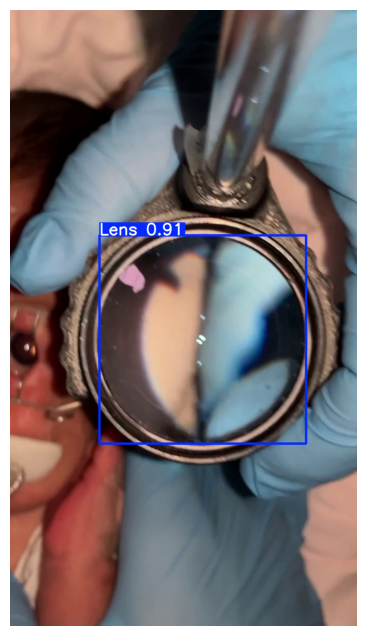

In [3]:
from ultralytics import RTDETR
import cv2
import matplotlib.pyplot as plt

model = RTDETR(r"C:\Users\ykita\ROP_AI_project\ROP_project\models\rtdetr-l-1697_1703.pt")

# 推論実行
image_path = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image\IMG_2025\IMG_2025_0016.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    #検出結果を画像に描画して表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    #結果の保存
    cv2.imwrite('result.jpg', r.plot())


In [ ]:
#Web画像のinference

from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 画像URLの指定
url = "https://365dentist.jp/wp-content/uploads/2023/06/26579868_s.jpg"

# 画像のダウンロード
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 推論実行
results = model(img)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# **YOLO11-seg トレーニングフォルダ構成**
```
準備する形
project_root/
│
└── data/
    |
    │
    ├── images/ --> データセットから移行
    │   ├── img1.jpg
    │   ├── img2.jpg
    │   └── ...
    │   
    ├── labels/ --> CVATからそのまま移す      　　　
    |       ├── img1.txt
    |       ├── img2.txt
    |       └── ...
    |
    | 
    ├── Train.txt　　　　　　# トレーニングファイルのリスト --> CVATからそのまま移す
    │
    └── dataset.yaml        # データセット設定ファイル  --> 新たに作成




最終形
project_root/
│
└── data/
    |
    │
    ├── train/
    │   ├── images/       # トレーニング用の画像
    │   │   ├── img1.jpg
    │   │   ├── img2.jpg
    │   │   └── ...
    │   │
    │   └── labels/      # トレーニング用のラベル（アノテーション）
    │       ├── img1.txt
    │       ├── img2.txt
    │       └── ...
    │
    ├── val/
    │   ├── images/      # 検証用の画像
    │   │   ├── img1.jpg
    │   │   └── ...
    │   │
    │   └── labels/     # 検証用のラベル
    │       ├── img1.txt
    │       └── ...
    │
    ├── test/           # (オプション) テスト用のデータセット
    |   ├── images/
    |   └── labels/
    │
    ├── Train.txt           # トレーニングファイルのリスト
    │
    └── dataset.yaml        # データセット設定ファイル:
```


## **dataset.yaml**

```
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./data/images/train
val: ./data/images/valid

# number of classes
nc: 3

# class names:
  0: Fundus
  1: Disc
  2: Macula

```

### **円形切り抜きバージョン**

In [ ]:
# # データセットの構造を作成するためのコード
# # 
# # 1. 画像ファイルのコピー元ディレクトリとコピー先ディレクトリを設定
# # 2. 処理対象のディレクトリリストを定義
# # 3. 各ディレクトリに対して以下の処理を実行:
# #   - 新しいディレクトリを作成 (_internalを付加)
# #   - 既存のディレクトリがある場合は削除
# #   - 元の画像ディレクトリから画像を読み込み
# #   - 画像の中心座標を計算
# #   - 画像処理:
# #     * 中心から半径rの円形マスクを作成
# #     * マスク外の領域を(114,114,114)の灰色で塗りつぶし
# #     * 円形領域内の画像のみを残す
# #     * 処理済み画像を新しいディレクトリに保存
# #   - 進捗状況をプログレスバーで表示


# import shutil
# import os
# from tqdm import tqdm

# # コピー元ディレクトリ
# source_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'

# # コピー先ディレクトリ
# destination_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'

# # 処理対象のディレクトリリスト
# image_dir = ['IMG_1697_lens', ]
# add_argument = "_internal"

# import cv2
# import numpy as np
# import os
# from tqdm import tqdm

# # 各ディレクトリに対して処理を実行
# for dir_name in image_dir:
#     # 新しいディレクトリ名を作成
#     new_dir = dir_name + add_argument
#     new_dir_path = os.path.join(destination_images_dir, new_dir)
    
#     # ディレクトリが存在する場合は削除
#     if os.path.exists(new_dir_path):
#         shutil.rmtree(new_dir_path)
#     # 新規ディレクトリ作成    
#     os.makedirs(new_dir_path)

#     # 元の画像ディレクトリのパス
#     source_dir = os.path.join(source_images_dir, dir_name)
    
#     # ディレクトリ内の全画像に対して処理
#     if os.path.isdir(source_dir):
#         files = os.listdir(source_dir)
#         for file in tqdm(files, desc=f"{dir_name}の処理中"):
#             if file.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 # 画像読み込み
#                 img_path = os.path.join(source_dir, file)
#                 img = cv2.imread(img_path)
                
#                 if img is not None:
#                     height, width = img.shape[:2]
                    
#                     # 画像の中心座標を計算
#                     center_x = width // 2
#                     center_y = height // 2
                    
#                     # 縦横比チェック
#                     aspect_ratio = height / width
#                     if 0.8 <= aspect_ratio <= 1.2:
#                         # マスク作成
#                         mask = np.zeros((height, width), dtype=np.uint8)
#                         radius = min(height, width) // 2
#                         cv2.circle(mask, (center_x, center_y), radius, 255, -1)
                        
#                         # マスク適用
#                         result = img.copy()
#                         result[mask == 0] = (114, 114, 114)  # 黒から灰色に変更
                        
#                         # 処理済み画像を保存
#                         output_path = os.path.join(new_dir_path, file)
#                         cv2.imwrite(output_path, result)


IMG_1697_lensの処理中:   0%|          | 0/1035 [00:00<?, ?it/s]

IMG_1697_lensの処理中: 100%|██████████| 1035/1035 [00:29<00:00, 34.54it/s]


In [ ]:
# このスクリプトは、指定されたディレクトリ内のラベルファイルと画像ファイルを
# 以下のようにコピーします：
#
# 1. source_labels_dir/LABELS_xxxx/ 内の全ファイル → destination_labels_dir/
# 2. source_images_dir/IMG_xxxx/ 内の全ファイル → destination_images_dir/
#
# 処理対象のディレクトリは、label_dirとimage_dirのリストで指定します。
# 各ディレクトリ内のファイルは全て、指定された出力先ディレクトリにコピーされます。
# tqdmを使用して、コピーの進捗状況をプログレスバーで表示します。

import shutil
import os
from tqdm import tqdm

# コピー元ディレクトリ
source_labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'
source_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'

# コピー先ディレクトリ
destination_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels'
destination_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images'

# 処理対象のディレクトリリスト
label_dir = ['LABELS_1700_lens_seg','LABELS_1703_lens_seg', 'LABELS_1702_lens_seg','LABELS_1699_lens_seg','LABELS_1698_lens_seg']
image_dir = ['IMG_1700_lens_internal','IMG_1703_lens_internal', 'IMG_1702_lens_internal', 'IMG_1699_lens_internal', 'IMG_1698_lens_internal']


# destination_labels_dirとdestination_images_dirが存在する場合は削除し、新規作成する
if os.path.exists(destination_labels_dir):
    shutil.rmtree(destination_labels_dir)
os.makedirs(destination_labels_dir, exist_ok=True)

if os.path.exists(destination_images_dir):
    shutil.rmtree(destination_images_dir)
os.makedirs(destination_images_dir, exist_ok=True)

# ラベルファイルのコピー
for label_folder in tqdm(label_dir, desc="ラベルファイルのコピー中"):
    source_folder = os.path.join(source_labels_dir, label_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_labels_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

# 画像ファイルのコピー
for image_folder in tqdm(image_dir, desc="画像ファイルのコピー中"):
    source_folder = os.path.join(source_images_dir, image_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_images_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

In [ ]:
#segmentationはcvatのラベルが1スタートなので、0スタートに修正
"""
# ラベルインデックス調整スクリプト
# 目的：YOLOフォーマットのアノテーションファイルのラベルインデックスを1始まりから0始まりに変更
# 対象：指定されたディレクトリ内のすべての.txtファイル
# 
# 入力ファイルの例：
# 1 0.399550 0.361382 0.482096 0.225870 ...  # ラベル1で始まる
# 2 0.452748 0.391491 0.488882 0.403540 ...  # ラベル2で始まる
#
# 出力ファイルの例：
# 0 0.399550 0.361382 0.482096 0.225870 ...  # ラベル0に変更
# 1 0.452748 0.391491 0.488882 0.403540 ...  # ラベル1に変更
#
# 使用方法：
# 1. ラベルファイルが含まれているディレクトリパスを設定
# 2. スクリプトを実行すると、すべての.txtファイルを処理
# 3. 元のファイルが直接更新されます
#
# 注意：元のファイルが直接更新されるため、実行前にファイルのバックアップを
# 取ることをお勧めします
"""

import os
from pathlib import Path

def adjust_labels(input_path):
    """
    ラベルファイルを読み込み、すべてのラベルインデックスを1減らします
    （1始まりから0始まりに変更）。
    元のファイルを調整後の内容で上書きします。
    
    引数：
        input_path (str): 入力ラベルファイルのパス
    """
    # 元のファイル内容を読み込み
    with open(input_path, 'r') as f:
        lines = f.readlines()
    
    adjusted_lines = []
    for line in lines:
        parts = line.strip().split()
        if parts:  # 空行をスキップ
            # ラベル（最初の数字）を1減らす
            adjusted_line = f"{int(parts[0]) - 1} {' '.join(parts[1:])}"
            adjusted_lines.append(adjusted_line)
    
    # 同じファイルに書き戻す
    with open(input_path, 'w') as f:
        f.write('\n'.join(adjusted_lines))

def process_directory(directory_path):
    """
    指定されたディレクトリ内のすべての.txtファイルを処理します。
    
    引数：
        directory_path (str): ラベルファイルを含むディレクトリのパス
    """
    directory = Path(directory_path)
    txt_files = list(directory.glob('*.txt'))
    total_files = len(txt_files)
    
    print(f"{directory_path} 内で {total_files} 個の.txtファイルが見つかりました")
    
    for i, file_path in enumerate(txt_files, 1):
        try:
            adjust_labels(str(file_path))
            print(f"処理完了 [{i}/{total_files}]: {file_path.name}")
        except Exception as e:
            print(f"エラーが発生しました {file_path.name}: {str(e)}")

# ディレクトリパス
labels_dir = r"C:\Users\ykita\ROP_AI_project\data\labels"

# ディレクトリ内のすべてのファイルを処理
process_directory(labels_dir)
print("\n処理が完了しました！")

In [24]:
# データの前処理
# 目的: 画像ファイルとラベルファイルの対応関係を確認
# 処理内容:
# 1. ラベルディレクトリとイメージディレクトリのパスを設定
# 2. 各ディレクトリからファイル名(拡張子なし)を取得
# 3. ラベルが存在しない画像ファイルを特定
# 4. 不一致の数を表示

import os

# ラベルとイメージのディレクトリパス
labels_dir = r"C:\Users\ykita\ROP_AI_project\data\labels"
images_dir = r"C:\Users\ykita\ROP_AI_project\data\images"

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}

# ラベルが存在しない画像ファイルを見つける
images_without_labels = image_files - label_files

# 結果を表示
print(f"ラベルが存在しない画像ファイルの数: {len(images_without_labels)}")

ラベルが存在しない画像ファイルの数: 2180


In [ ]:
# Detectionの場合は
# ラベルが存在しない画像ファイルを削除
# for img_name in images_without_labels:
#     img_path = os.path.join(images_dir, img_name + '.jpg')
#     try:
#         os.remove(img_path)
#         print(f"削除しました: {img_path}")
#     except OSError as e:
#         print(f"削除に失敗しました {img_path}: {e}")

# print("不一致ファイルの削除が完了しました")

In [ ]:
# Segmentationの場合は
# 画像が存在しないlabelファイルに空のtxtを割り当て
import os

# ディレクトリのパス
labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels'
images_dir = r'C:\Users\ykita\ROP_AI_project\data\images'

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}
print(f"label_files: {label_files}")
print(f"len(label_files): {len(label_files)}")

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}
print(f"image_files: {image_files}")
print(f"len(image_files): {len(image_files)}")

# ラベルが存在しない画像ファイルを見つける
labels_without_labels = image_files - label_files
print(labels_without_labels)

# 空のテキストファイルを割り当て
for label in labels_without_labels:
    label_path = os.path.join(labels_dir, label + '.txt')
    with open(label_path, 'w') as f:
        pass  # 空のファイルを作成
    print(f"空のテキストファイルを作成しました: {label_path}")

In [27]:
# 1. 指定されたディレクトリから画像ファイル(.jpg, .png, .tif)を取得
# 2. 画像ファイルをランダムに並び替え
# 3. train/validディレクトリを作成
# 4. データを8:2の比率で分割
# 5. 画像ファイルと対応するラベルファイル(.txt)を適切なディレクトリに移動

import os
import shutil
import random
from tqdm import tqdm

# データディレクトリのパス設定
data_img_dir = r"C:\Users\ykita\ROP_AI_project\data\images"
data_label_dir = r"C:\Users\ykita\ROP_AI_project\data\labels"
src_img_dir = r"C:\Users\ykita\ROP_AI_project\data\images"
src_label_dir = r"C:\Users\ykita\ROP_AI_project\data\labels"

# ソースディレクトリの画像ファイルを直接取得（サブディレクトリを除く）
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    print(f"見つかった画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # データの分割
    random.shuffle(image_files)
    train_size = int(len(image_files) * 0.8)
    train_files = image_files[:train_size]
    valid_files = image_files[train_size:]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データ数: {len(train_files)}")
    print(f"検証データ数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

見つかった画像ファイル数: 5001


validデータの移動: 100%|██████████| 1001/1001 [00:01<00:00, 678.86it/s]

訓練データ数: 4000
検証データ数: 1001
データの分割と移動が完了しました


In [28]:
import os

# ディレクトリのパス
train_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images\train'
train_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels\train'
val_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images\valid'
val_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels\valid'

# 対応の確認と削除
def check_and_remove_unmatched_files(images_dir, labels_dir):
    image_files = set(os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg'))
    label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt'))

    unmatched_images = image_files - label_files
    unmatched_labels = label_files - image_files

    # 対応のない画像ファイルを削除
    for image in unmatched_images:
        image_path = os.path.join(images_dir, image + '.jpg')
        if os.path.exists(image_path):
            print(f"画像ファイル {image_path} に対応するラベルがありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(image_path)
                print(f"{image_path} を削除しました。")

    # 対応のないラベルファイルを削除
    for label in unmatched_labels:
        label_path = os.path.join(labels_dir, label + '.txt')
        if os.path.exists(label_path):
            print(f"ラベルファイル {label_path} に対応する画像がありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(label_path)
                print(f"{label_path} を削除しました。")

# 訓練データと検証データの対応確認
check_and_remove_unmatched_files(train_images_dir, train_labels_dir)
check_and_remove_unmatched_files(val_images_dir, val_labels_dir)

In [29]:
import os

def count_files_in_directory(directory):
    """指定されたディレクトリ内のファイル数をカウントする"""
    if not os.path.exists(directory):
        return 0
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# データディレクトリのパス
base_path = r"C:\Users\ykita\ROP_AI_project\data"

# 各ディレクトリのパス
train_images_path = os.path.join(base_path, "images", "train")
valid_images_path = os.path.join(base_path, "images", "valid")
train_labels_path = os.path.join(base_path, "labels", "train")
valid_labels_path = os.path.join(base_path, "labels", "valid")

# ファイル数をカウント
train_images_count = count_files_in_directory(train_images_path)
valid_images_count = count_files_in_directory(valid_images_path)
train_labels_count = count_files_in_directory(train_labels_path)
valid_labels_count = count_files_in_directory(valid_labels_path)

# 結果を表示
print("=== ファイル数チェック結果 ===")
print(f"Train Images: {train_images_count} files")
print(f"Train Labels: {train_labels_count} files")
print(f"Valid Images: {valid_images_count} files")
print(f"Valid Labels: {valid_labels_count} files")

print("\n=== 一致チェック ===")
train_match = train_images_count == train_labels_count
valid_match = valid_images_count == valid_labels_count

if train_match:
    print("✓ Train: 画像とラベルのファイル数が一致しています")
else:
    print(f"✗ Train: 画像とラベルのファイル数が一致していません (差: {abs(train_images_count - train_labels_count)})")

if valid_match:
    print("✓ Valid: 画像とラベルのファイル数が一致しています")
else:
    print(f"✗ Valid: 画像とラベルのファイル数が一致していません (差: {abs(valid_images_count - valid_labels_count)})")

if train_match and valid_match:
    print("\n🎉 すべてのディレクトリでファイル数が一致しています！")
else:
    print("\n⚠️  一部のディレクトリでファイル数が一致していません。")

=== ファイル数チェック結果 ===
Train Images: 4000 files
Train Labels: 4000 files
Valid Images: 1001 files
Valid Labels: 1001 files

=== 一致チェック ===
✓ Train: 画像とラベルのファイル数が一致しています
✓ Valid: 画像とラベルのファイル数が一致しています

🎉 すべてのディレクトリでファイル数が一致しています！


### **YAMLファイルを作成 (for training)**

In [30]:
import yaml
import os

# data = {
#     'train': r'C:\Users\ykita\ROP_AI_project\data\images\train',
#     'val': r'C:\Users\ykita\ROP_AI_project\data\images\valid',
#     'nc': 1,
#     'names': {
#         0: 'Lens',
#     }
# }

data = {
    'train': r'C:\Users\ykita\ROP_AI_project\data\images\train',
    'val': r'C:\Users\ykita\ROP_AI_project\data\images\valid',
    'nc': 3,
    'names': {
        0: 'Fundus',
        1: 'Disc',
        2: 'Macula',
    }
}

yaml_path = 'data/data.yaml'

# dataディレクトリが存在しない場合は作成
os.makedirs('data', exist_ok=True)

# ファイルの存在確認
if os.path.exists(yaml_path):
    print(f"既存の {yaml_path} を上書きします。")
else:
    print(f"新規に {yaml_path} を作成します。")

# YAMLファイルの書き出し（既存ファイルは上書き）
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.safe_dump(data, f, sort_keys=False, allow_unicode=True)

print("処理が完了しました。")

新規に data/data.yaml を作成します。
処理が完了しました。


# **Train YOLO11-seg**

In [ ]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# RTDETRモデルのダウンロードと初期化
try:
    #model = RTDETR('rtdetr-l.pt')
    # model = YOLO("yolo11lpt")  # load a pretrained model (recommended for training)
    model = YOLO("yolo11m-seg.pt")  # load a pretrained model (recommended for training)
except:
    #wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    #model = RTDETR('rtdetr-l.pt')
    wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt')
    model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)
    # wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m-seg.pt')
    # model = YOLO(r"C:\Users\ykita\ROP_AI_project\runs\segment\train9\weights\last.pt")  # load a pretrained model (recommended for training)
    
# Fine-tune
results = model.train(data=r'data\data.yaml', epochs=1000, patience=100, batch=8, imgsz=640, device=0, degrees=180, flipud=0.5, fliplr=0.5)

100%|██████████| 43.3M/43.3M [00:01<00:00, 24.2MB/s]


New https://pypi.org/project/ultralytics/8.3.179 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.59  Python-3.8.6 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=data\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

100%|██████████| 5.35M/5.35M [00:00<00:00, 44.0MB/s]


AMP: checks passed 


train: Scanning C:\Users\ykita\ROP_AI_project\data\labels\train... 4000 images, 1729 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:18<00:00, 213.99it/s]


train: New cache created: C:\Users\ykita\ROP_AI_project\data\labels\train.cache


val: Scanning C:\Users\ykita\ROP_AI_project\data\labels\valid... 1001 images, 451 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:04<00:00, 227.00it/s]


val: New cache created: C:\Users\ykita\ROP_AI_project\data\labels\valid.cache
Plotting labels to runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      5.25G      1.177      2.533       2.03      1.534         22        640: 100%|██████████| 500/500 [36:21<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:45<00:00,  2.63s/it]

                   all       1001       1085      0.777      0.381       0.42      0.292       0.78       0.38      0.418      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      5.37G      1.095      2.152      1.225      1.418         11        640: 100%|██████████| 500/500 [47:57<00:00,  5.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [04:36<00:00,  4.39s/it]

                   all       1001       1085      0.521      0.408      0.467      0.324      0.517      0.404      0.454      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      5.38G      1.168      2.296      1.274      1.463         19        640: 100%|██████████| 500/500 [47:47<00:00,  5.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [04:39<00:00,  4.44s/it]


                   all       1001       1085      0.876      0.392      0.475      0.276       0.86       0.38      0.452      0.222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      5.37G      1.217      2.282      1.255      1.497         20        640: 100%|██████████| 500/500 [38:51<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:38<00:00,  2.52s/it]

                   all       1001       1085      0.708      0.534      0.588      0.394      0.705      0.531       0.58      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      5.36G      1.166      2.203       1.17      1.453         25        640: 100%|██████████| 500/500 [27:11<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:38<00:00,  2.51s/it]

                   all       1001       1085      0.734      0.622      0.676      0.443      0.728      0.619      0.662      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      5.36G      1.145      2.131      1.091      1.434         15        640: 100%|██████████| 500/500 [26:29<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:33<00:00,  2.44s/it]

                   all       1001       1085      0.798      0.643      0.703      0.471      0.806      0.644      0.703      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      5.37G      1.115      2.109      1.065      1.411         27        640: 100%|██████████| 500/500 [27:27<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:43<00:00,  2.59s/it]

                   all       1001       1085      0.739      0.577       0.64      0.412      0.722      0.571      0.626      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      5.36G      1.109      2.049      1.018      1.403         12        640: 100%|██████████| 500/500 [26:37<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:27<00:00,  2.35s/it]

                   all       1001       1085      0.738      0.698      0.723      0.498      0.746      0.687       0.72      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      5.36G      1.066      1.989      0.966      1.363         24        640: 100%|██████████| 500/500 [24:44<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:19<00:00,  2.21s/it]

                   all       1001       1085      0.809      0.698      0.731      0.503      0.805      0.695      0.726      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      5.37G      1.084      1.981     0.9504      1.373         17        640: 100%|██████████| 500/500 [24:52<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:19<00:00,  2.21s/it]

                   all       1001       1085      0.679      0.712       0.74       0.51      0.677       0.71      0.734      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      5.35G      1.061       1.93     0.9223      1.355         21        640: 100%|██████████| 500/500 [23:35<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:18<00:00,  2.19s/it]

                   all       1001       1085      0.768      0.742      0.768      0.528      0.768       0.74      0.758      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      5.39G      1.052      1.923     0.8995      1.351         16        640: 100%|██████████| 500/500 [24:09<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:15<00:00,  2.14s/it]

                   all       1001       1085      0.769      0.714      0.753      0.528      0.773      0.719       0.75      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      5.37G      1.044        1.9     0.8774      1.339         16        640: 100%|██████████| 500/500 [24:27<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:19<00:00,  2.22s/it]

                   all       1001       1085      0.758      0.728       0.76       0.53      0.737      0.728       0.75      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      5.35G       1.03      1.874     0.8822      1.325         20        640: 100%|██████████| 500/500 [23:36<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:21<00:00,  2.24s/it]

                   all       1001       1085      0.752      0.745      0.776       0.53      0.772      0.736      0.767      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      5.35G      1.008       1.85      0.843      1.307         27        640: 100%|██████████| 500/500 [23:55<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:17<00:00,  2.18s/it]

                   all       1001       1085      0.796      0.768      0.793      0.562      0.808       0.77      0.793      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      5.37G      1.013      1.814     0.8259      1.317         20        640: 100%|██████████| 500/500 [21:55<00:00,  2.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:00<00:00,  1.91s/it]

                   all       1001       1085      0.785      0.742      0.784      0.545      0.786      0.743      0.781      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      5.35G      1.013      1.835     0.8211      1.317         20        640: 100%|██████████| 500/500 [20:01<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:59<00:00,  1.89s/it]

                   all       1001       1085      0.774      0.756      0.785      0.543      0.779      0.758      0.783      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      5.35G     0.9845      1.791     0.7947      1.298         19        640: 100%|██████████| 500/500 [19:09<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:51<00:00,  1.77s/it]

                   all       1001       1085      0.781      0.767      0.795      0.557      0.785      0.763      0.788      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      5.35G     0.9809       1.76     0.7887       1.29         16        640: 100%|██████████| 500/500 [21:20<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.11s/it]

                   all       1001       1085      0.788      0.749      0.784      0.564      0.797      0.748       0.78      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      5.35G     0.9927      1.768     0.7963      1.297         20        640: 100%|██████████| 500/500 [18:29<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.86s/it]

                   all       1001       1085      0.815      0.787      0.807      0.565      0.809      0.779        0.8       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      5.35G     0.9721      1.746     0.7667      1.281         19        640: 100%|██████████| 500/500 [18:46<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.86s/it]

                   all       1001       1085      0.817      0.784        0.8      0.563      0.813      0.779       0.79      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      5.37G     0.9765       1.75       0.77       1.29         12        640: 100%|██████████| 500/500 [18:54<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:02<00:00,  1.94s/it]

                   all       1001       1085      0.846      0.766      0.813      0.578      0.838      0.755      0.803      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      5.37G     0.9689      1.753     0.7626      1.284         18        640: 100%|██████████| 500/500 [19:29<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.87s/it]

                   all       1001       1085      0.847      0.774      0.812      0.568      0.836      0.769      0.802      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      5.36G     0.9672      1.731     0.7642      1.274         29        640: 100%|██████████| 500/500 [19:16<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:59<00:00,  1.90s/it]

                   all       1001       1085      0.833      0.785       0.81      0.567      0.828      0.782      0.806      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      5.37G     0.9631      1.734      0.748      1.274         24        640: 100%|██████████| 500/500 [20:49<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:03<00:00,  1.96s/it]

                   all       1001       1085      0.842      0.758      0.792      0.563      0.831      0.762      0.797      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      5.35G     0.9584      1.751     0.7442      1.271         15        640: 100%|██████████| 500/500 [19:45<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:03<00:00,  1.97s/it]

                   all       1001       1085      0.801      0.787      0.812      0.578      0.809       0.79      0.811      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      5.37G     0.9509      1.713     0.7343       1.27         16        640: 100%|██████████| 500/500 [19:55<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:56<00:00,  1.85s/it]

                   all       1001       1085      0.802      0.769      0.805      0.571      0.807      0.768      0.801      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      5.36G     0.9497      1.716     0.7352      1.265         15        640: 100%|██████████| 500/500 [19:31<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:05<00:00,  1.98s/it]

                   all       1001       1085      0.827      0.767       0.81      0.568      0.823      0.763      0.801      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      5.35G     0.9427      1.697     0.7241      1.263         28        640: 100%|██████████| 500/500 [19:37<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:01<00:00,  1.93s/it]

                   all       1001       1085      0.824      0.795      0.818      0.581      0.819      0.789      0.814      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      5.37G     0.9316      1.667     0.7159      1.249         18        640: 100%|██████████| 500/500 [19:03<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:54<00:00,  1.81s/it]

                   all       1001       1085      0.822      0.804      0.821      0.581      0.825      0.794      0.817      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      5.35G     0.9382      1.686      0.707      1.256         23        640: 100%|██████████| 500/500 [19:14<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:01<00:00,  1.92s/it]

                   all       1001       1085      0.823      0.796      0.827       0.59      0.822      0.795      0.821      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      5.37G     0.9303      1.666     0.7036      1.252         12        640: 100%|██████████| 500/500 [18:40<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.86s/it]

                   all       1001       1085      0.844      0.786      0.826       0.59      0.848      0.784      0.823       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      5.36G     0.9244      1.644     0.6874      1.244         28        640: 100%|██████████| 500/500 [18:41<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.88s/it]

                   all       1001       1085      0.845      0.794      0.826      0.598      0.842      0.788      0.823      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      5.37G     0.9181      1.644     0.6858      1.238         14        640: 100%|██████████| 500/500 [18:56<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:00<00:00,  1.91s/it]

                   all       1001       1085      0.817      0.785      0.818      0.583      0.819      0.785      0.814       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      5.36G     0.9225      1.645     0.6753      1.241         18        640: 100%|██████████| 500/500 [19:21<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:00<00:00,  1.91s/it]

                   all       1001       1085      0.814      0.804      0.826      0.602       0.82        0.8      0.827       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      5.35G     0.9217      1.642     0.6825      1.249         17        640: 100%|██████████| 500/500 [19:09<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.89s/it]

                   all       1001       1085      0.826      0.796      0.832       0.59      0.833        0.8      0.833      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      5.38G     0.9135      1.625     0.6598      1.232         31        640: 100%|██████████| 500/500 [19:05<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:05<00:00,  1.99s/it]

                   all       1001       1085      0.869      0.761      0.825      0.588      0.873       0.76       0.82      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      5.36G     0.9113      1.623     0.6651      1.239         16        640: 100%|██████████| 500/500 [19:24<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:04<00:00,  1.97s/it]

                   all       1001       1085      0.837      0.809      0.833      0.591      0.841      0.811      0.831       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      5.35G     0.9148      1.643     0.6741      1.231         20        640: 100%|██████████| 500/500 [18:52<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.89s/it]

                   all       1001       1085      0.825      0.815       0.84      0.597      0.826      0.815      0.838      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      5.35G     0.9107      1.623     0.6655      1.232         16        640: 100%|██████████| 500/500 [18:28<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:59<00:00,  1.90s/it]

                   all       1001       1085       0.86      0.813      0.846      0.605      0.858      0.805      0.842      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      5.37G     0.9087      1.613     0.6627      1.231         18        640: 100%|██████████| 500/500 [18:36<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:04<00:00,  1.98s/it]

                   all       1001       1085      0.843      0.814      0.834      0.603      0.846      0.817      0.837       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      5.35G     0.8993      1.609     0.6592      1.228         14        640: 100%|██████████| 500/500 [19:59<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:02<00:00,  1.95s/it]

                   all       1001       1085      0.839      0.813      0.841      0.603      0.835      0.815      0.842      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      5.37G     0.9083      1.608     0.6606      1.231         23        640: 100%|██████████| 500/500 [21:29<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:11<00:00,  2.09s/it]

                   all       1001       1085      0.864      0.805      0.843      0.605      0.871      0.812      0.847      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      5.38G     0.9063      1.611     0.6486      1.229         14        640: 100%|██████████| 500/500 [21:57<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.11s/it]

                   all       1001       1085      0.841      0.816      0.837      0.599      0.847       0.82       0.84       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      5.35G     0.9054      1.595     0.6511      1.225         23        640: 100%|██████████| 500/500 [22:23<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:13<00:00,  2.12s/it]

                   all       1001       1085       0.85      0.818      0.842      0.599      0.851      0.815      0.841      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      5.35G      0.898      1.591     0.6472      1.222         15        640: 100%|██████████| 500/500 [22:38<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.10s/it]

                   all       1001       1085      0.824      0.805      0.844      0.607      0.841      0.793      0.841      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      5.35G     0.8924      1.609     0.6484      1.218         10        640: 100%|██████████| 500/500 [22:47<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:15<00:00,  2.16s/it]

                   all       1001       1085      0.853      0.809      0.855      0.622      0.855      0.809      0.856      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      5.36G     0.8879      1.581     0.6444      1.219         16        640: 100%|██████████| 500/500 [22:08<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:10<00:00,  2.07s/it]

                   all       1001       1085      0.865       0.82       0.86      0.612      0.851       0.81      0.848      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      5.35G     0.8965      1.578     0.6419      1.216         12        640: 100%|██████████| 500/500 [21:19<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:05<00:00,  1.99s/it]

                   all       1001       1085      0.869       0.81      0.848      0.609      0.864      0.807      0.843      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      5.34G     0.8858      1.566     0.6373       1.22         15        640: 100%|██████████| 500/500 [21:13<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:15<00:00,  2.15s/it]

                   all       1001       1085      0.842      0.818      0.852      0.612      0.848      0.814      0.854      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      5.35G     0.8746       1.55     0.6347      1.203         25        640: 100%|██████████| 500/500 [22:21<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:13<00:00,  2.13s/it]

                   all       1001       1085      0.856      0.809      0.857      0.619      0.851      0.805      0.852      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      5.35G     0.8864      1.545     0.6359      1.207         19        640: 100%|██████████| 500/500 [22:43<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:16<00:00,  2.17s/it]

                   all       1001       1085      0.838      0.837      0.861      0.614      0.833      0.825      0.853      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      5.35G      0.887       1.56     0.6265      1.208         18        640: 100%|██████████| 500/500 [22:22<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:11<00:00,  2.09s/it]

                   all       1001       1085      0.876      0.825      0.856      0.619      0.891      0.809      0.854      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      5.38G     0.8873      1.558     0.6324      1.212         26        640: 100%|██████████| 500/500 [22:42<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.10s/it]

                   all       1001       1085      0.889      0.821      0.866      0.621      0.885      0.813      0.857      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      5.35G     0.8762      1.538       0.63      1.208         25        640: 100%|██████████| 500/500 [22:00<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.11s/it]

                   all       1001       1085      0.862      0.816      0.863      0.623       0.86      0.815      0.862      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      5.35G     0.8782      1.558     0.6252      1.205         14        640: 100%|██████████| 500/500 [21:31<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:13<00:00,  2.13s/it]

                   all       1001       1085      0.851      0.829       0.86      0.619      0.852      0.828      0.856      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      5.35G     0.8747      1.563     0.6231        1.2         14        640: 100%|██████████| 500/500 [22:31<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:11<00:00,  2.09s/it]

                   all       1001       1085      0.877      0.826       0.86       0.62      0.859      0.829      0.857      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      5.35G     0.8809      1.529     0.6156      1.207         18        640: 100%|██████████| 500/500 [22:39<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.11s/it]

                   all       1001       1085      0.848      0.832      0.863      0.627      0.845      0.829      0.858       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      5.36G      0.877      1.539     0.6101        1.2         13        640: 100%|██████████| 500/500 [22:50<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:18<00:00,  2.19s/it]

                   all       1001       1085      0.864      0.839      0.869      0.629      0.866      0.846      0.867      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      5.35G     0.8669      1.537     0.6097        1.2         20        640: 100%|██████████| 500/500 [23:03<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:20<00:00,  2.23s/it]

                   all       1001       1085      0.836      0.836      0.862      0.622      0.848      0.827      0.858      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      5.35G     0.8689      1.525     0.6105      1.198         20        640: 100%|██████████| 500/500 [23:29<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.11s/it]

                   all       1001       1085       0.84      0.839      0.868      0.621      0.839      0.827      0.859      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      5.35G     0.8716       1.53     0.6066      1.199         13        640: 100%|██████████| 500/500 [23:41<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.11s/it]

                   all       1001       1085      0.888      0.811      0.867      0.631      0.883      0.814      0.861      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      5.35G     0.8638      1.519     0.6057      1.187         16        640: 100%|██████████| 500/500 [23:48<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:19<00:00,  2.22s/it]

                   all       1001       1085      0.897      0.812      0.867      0.626      0.895      0.809      0.866      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      5.38G     0.8675      1.514     0.5979      1.189         20        640: 100%|██████████| 500/500 [23:31<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:04<00:00,  1.97s/it]

                   all       1001       1085       0.86      0.822      0.866      0.633      0.852      0.813       0.86      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      5.36G     0.8596      1.527     0.5966      1.187         26        640: 100%|██████████| 500/500 [23:21<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:13<00:00,  2.12s/it]

                   all       1001       1085      0.862      0.837      0.871      0.633      0.859      0.835      0.867      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      5.35G     0.8735      1.524     0.6129      1.195         18        640: 100%|██████████| 500/500 [22:57<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:06<00:00,  2.00s/it]

                   all       1001       1085      0.863      0.836       0.87      0.635      0.857      0.829      0.862      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      5.36G     0.8672      1.492     0.5979      1.192         33        640: 100%|██████████| 500/500 [20:55<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:01<00:00,  1.93s/it]

                   all       1001       1085       0.86       0.84       0.87      0.636      0.857      0.838       0.87      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      5.35G     0.8587      1.494     0.5848      1.188         16        640: 100%|██████████| 500/500 [20:06<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:05<00:00,  1.99s/it]

                   all       1001       1085      0.839      0.837      0.868      0.631      0.846      0.828      0.866      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      5.35G     0.8457      1.493     0.5825      1.185         11        640: 100%|██████████| 500/500 [19:11<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:56<00:00,  1.85s/it]

                   all       1001       1085      0.872      0.837      0.874      0.635      0.864      0.838      0.871      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      5.35G     0.8538      1.488     0.5964      1.188         23        640: 100%|██████████| 500/500 [18:45<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:03<00:00,  1.96s/it]

                   all       1001       1085      0.851      0.843      0.869      0.629      0.851      0.842      0.866      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      5.36G     0.8676       1.51      0.592      1.186         11        640: 100%|██████████| 500/500 [18:37<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:56<00:00,  1.85s/it]

                   all       1001       1085      0.873      0.834      0.876      0.636      0.864      0.825      0.868      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      5.38G     0.8654      1.499      0.593      1.193         19        640: 100%|██████████| 500/500 [19:28<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:59<00:00,  1.90s/it]

                   all       1001       1085      0.884      0.838      0.875      0.635      0.881      0.834      0.869      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      5.35G     0.8467      1.469     0.5717      1.178         28        640: 100%|██████████| 500/500 [18:24<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:50<00:00,  1.76s/it]

                   all       1001       1085      0.888      0.838      0.873      0.641      0.881      0.833      0.866      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      5.35G      0.842      1.483     0.5721      1.179         21        640: 100%|██████████| 500/500 [17:55<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:56<00:00,  1.85s/it]

                   all       1001       1085      0.876      0.845      0.872      0.636      0.872      0.845       0.87      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      5.38G     0.8404      1.471     0.5778      1.179         30        640: 100%|██████████| 500/500 [19:08<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.89s/it]

                   all       1001       1085      0.889      0.849      0.882      0.643      0.897      0.835      0.874      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      5.35G     0.8548      1.465     0.5763      1.185         22        640: 100%|██████████| 500/500 [19:07<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.88s/it]

                   all       1001       1085      0.868      0.853      0.876      0.639      0.868      0.853      0.877      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      5.36G     0.8505      1.475     0.5753      1.178         27        640: 100%|██████████| 500/500 [19:24<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:07<00:00,  2.02s/it]

                   all       1001       1085      0.875       0.85      0.875      0.638       0.87      0.846      0.871       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      5.35G     0.8523       1.49     0.5905      1.187         28        640: 100%|██████████| 500/500 [18:13<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:49<00:00,  1.74s/it]

                   all       1001       1085      0.883      0.827      0.879      0.634      0.869      0.826      0.874      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      5.39G     0.8491      1.486     0.5765      1.179         16        640: 100%|██████████| 500/500 [17:34<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:51<00:00,  1.77s/it]

                   all       1001       1085      0.871      0.851      0.882      0.641      0.864      0.844      0.876      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      5.39G     0.8367      1.467     0.5698      1.173          8        640: 100%|██████████| 500/500 [17:54<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:53<00:00,  1.79s/it]

                   all       1001       1085      0.878       0.85      0.882       0.64       0.87      0.845      0.877      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      5.36G     0.8397      1.453     0.5569      1.175         20        640: 100%|██████████| 500/500 [18:33<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:50<00:00,  1.76s/it]

                   all       1001       1085      0.874      0.837      0.877      0.643      0.877      0.827      0.879      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      5.38G     0.8488      1.459     0.5719      1.177         21        640: 100%|██████████| 500/500 [18:05<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:51<00:00,  1.77s/it]

                   all       1001       1085      0.882      0.865      0.884      0.647      0.888      0.855      0.882      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      5.37G     0.8462      1.457     0.5679      1.174          9        640: 100%|██████████| 500/500 [18:29<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.89s/it]

                   all       1001       1085      0.892      0.853      0.884      0.642       0.88      0.856      0.882       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      5.36G     0.8392      1.458     0.5707      1.173         15        640: 100%|██████████| 500/500 [19:53<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:52<00:00,  1.78s/it]

                   all       1001       1085      0.905      0.852      0.893      0.649      0.898      0.848      0.887      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      5.38G      0.842      1.466     0.5628      1.172         18        640: 100%|██████████| 500/500 [20:11<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:04<00:00,  1.97s/it]

                   all       1001       1085      0.876       0.86      0.892      0.648       0.88       0.85      0.885      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      5.35G       0.83      1.458     0.5633      1.166         21        640: 100%|██████████| 500/500 [20:22<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:06<00:00,  2.01s/it]

                   all       1001       1085      0.881      0.847      0.876      0.647      0.878      0.845      0.874      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      5.36G     0.8348      1.456     0.5547       1.17         19        640: 100%|██████████| 500/500 [20:51<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:02<00:00,  1.94s/it]

                   all       1001       1085      0.903      0.848      0.883      0.648      0.902      0.855       0.89      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      5.35G     0.8286      1.432     0.5524       1.17         19        640: 100%|██████████| 500/500 [20:41<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:01<00:00,  1.93s/it]

                   all       1001       1085      0.882      0.869      0.891      0.647      0.885      0.866      0.891      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      5.35G     0.8329      1.445     0.5563       1.16         12        640: 100%|██████████| 500/500 [21:08<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:07<00:00,  2.02s/it]

                   all       1001       1085      0.875      0.872      0.893      0.655      0.867      0.867      0.889      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      5.36G      0.829      1.434      0.551      1.163         28        640: 100%|██████████| 500/500 [21:29<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:05<00:00,  1.99s/it]

                   all       1001       1085      0.897      0.865      0.893      0.656      0.904      0.858      0.891      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      5.35G     0.8402      1.443     0.5453      1.164         26        640: 100%|██████████| 500/500 [21:37<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:06<00:00,  2.01s/it]

                   all       1001       1085       0.89      0.865      0.881       0.65      0.881      0.857      0.876      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      5.35G     0.8307      1.427     0.5609      1.162         28        640: 100%|██████████| 500/500 [20:47<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.87s/it]

                   all       1001       1085      0.877      0.864      0.887      0.655      0.879      0.864      0.888      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      5.35G     0.8319      1.451     0.5578       1.17         19        640: 100%|██████████| 500/500 [21:49<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:01<00:00,  1.93s/it]

                   all       1001       1085       0.89      0.868      0.887      0.654      0.886      0.864      0.883      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      5.35G     0.8256      1.446      0.553      1.161         22        640: 100%|██████████| 500/500 [17:37<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:42<00:00,  1.63s/it]

                   all       1001       1085      0.867      0.876      0.888      0.654      0.875      0.869      0.888      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      5.35G     0.8287      1.444     0.5552      1.166         20        640: 100%|██████████| 500/500 [16:45<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:48<00:00,  1.72s/it]

                   all       1001       1085      0.873      0.868      0.897      0.651      0.893      0.848      0.894      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      5.34G     0.8252       1.42     0.5414      1.165         19        640: 100%|██████████| 500/500 [16:56<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:42<00:00,  1.62s/it]

                   all       1001       1085      0.881      0.863      0.895      0.658       0.89      0.857      0.896       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      5.34G     0.8261      1.433     0.5373      1.167         24        640: 100%|██████████| 500/500 [16:46<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:45<00:00,  1.67s/it]

                   all       1001       1085      0.891      0.866      0.894      0.656      0.889      0.863      0.892       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      5.35G     0.8228       1.43     0.5392      1.159         16        640: 100%|██████████| 500/500 [16:06<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:40<00:00,  1.60s/it]

                   all       1001       1085      0.906      0.861      0.897       0.65      0.904      0.859      0.895      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      5.34G      0.814      1.398     0.5296      1.151         25        640: 100%|██████████| 500/500 [15:47<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:39<00:00,  1.58s/it]

                   all       1001       1085      0.905      0.862      0.897      0.657      0.906      0.861      0.896      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      5.34G     0.8286      1.431     0.5408      1.157         18        640: 100%|██████████| 500/500 [15:43<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:34<00:00,  1.50s/it]

                   all       1001       1085      0.905      0.868      0.902      0.659      0.907      0.869      0.901      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      5.36G     0.8238      1.428      0.551      1.162         25        640: 100%|██████████| 500/500 [15:59<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:41<00:00,  1.61s/it]

                   all       1001       1085      0.883      0.862      0.895      0.658      0.884      0.863      0.896      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      5.35G     0.8185      1.412     0.5369      1.157         21        640: 100%|██████████| 500/500 [16:16<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:37<00:00,  1.54s/it]

                   all       1001       1085      0.884      0.865      0.899       0.66      0.894      0.865      0.897      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      5.35G     0.8186      1.421     0.5438      1.154         15        640: 100%|██████████| 500/500 [15:53<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:35<00:00,  1.52s/it]

                   all       1001       1085      0.902      0.868      0.904      0.662        0.9      0.867        0.9      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      5.35G     0.8235      1.409     0.5347      1.162         21        640: 100%|██████████| 500/500 [15:15<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:41<00:00,  1.61s/it]

                   all       1001       1085      0.883      0.874      0.903      0.665      0.892      0.859      0.899      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      5.36G     0.8127      1.396     0.5313      1.157         20        640: 100%|██████████| 500/500 [15:57<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:49<00:00,  1.73s/it]

                   all       1001       1085      0.877      0.871        0.9       0.66      0.878      0.869      0.894      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      5.35G     0.8167      1.414     0.5381      1.153         10        640: 100%|██████████| 500/500 [17:57<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:43<00:00,  1.64s/it]

                   all       1001       1085      0.887      0.861      0.899      0.664      0.883      0.858      0.895      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      5.37G     0.8135      1.401     0.5351      1.151         19        640: 100%|██████████| 500/500 [18:25<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:51<00:00,  1.76s/it]

                   all       1001       1085      0.906       0.86      0.907      0.663      0.904      0.858      0.902      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      5.36G     0.8108      1.396     0.5344      1.143         11        640: 100%|██████████| 500/500 [19:10<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.87s/it]

                   all       1001       1085      0.907      0.861      0.902      0.664      0.908      0.861      0.902      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      5.35G     0.8155       1.41     0.5284      1.152         22        640: 100%|██████████| 500/500 [19:19<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:53<00:00,  1.79s/it]

                   all       1001       1085      0.909      0.871        0.9      0.664      0.904      0.867      0.895      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      5.35G     0.8178      1.387     0.5295      1.152         13        640: 100%|██████████| 500/500 [18:09<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:49<00:00,  1.73s/it]

                   all       1001       1085      0.909       0.86        0.9      0.666      0.897      0.865      0.897      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      5.35G     0.8117      1.392     0.5287      1.152         17        640: 100%|██████████| 500/500 [17:24<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:43<00:00,  1.64s/it]

                   all       1001       1085      0.893      0.869      0.896      0.666      0.891      0.868      0.893      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      5.37G     0.8063      1.393      0.526      1.146         18        640: 100%|██████████| 500/500 [18:27<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:46<00:00,  1.69s/it]

                   all       1001       1085      0.892       0.87      0.896      0.666       0.89      0.868      0.892      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      5.36G     0.8212      1.398     0.5384      1.154         17        640: 100%|██████████| 500/500 [16:18<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:52<00:00,  1.79s/it]

                   all       1001       1085      0.899       0.87      0.904      0.665      0.906      0.863      0.903      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      5.35G     0.8077      1.397     0.5292      1.151         10        640: 100%|██████████| 500/500 [19:49<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:05<00:00,  1.99s/it]

                   all       1001       1085      0.909      0.869      0.908      0.666      0.904      0.865      0.904       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      5.38G     0.8063      1.399      0.528      1.147         16        640: 100%|██████████| 500/500 [19:11<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:05<00:00,  2.00s/it]

                   all       1001       1085      0.902      0.868      0.896      0.665      0.899      0.867      0.895       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      5.35G     0.8089      1.393     0.5206      1.147         14        640: 100%|██████████| 500/500 [20:06<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:01<00:00,  1.93s/it]

                   all       1001       1085      0.898      0.875        0.9      0.666      0.894      0.873        0.9      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      5.35G      0.801      1.382     0.5308      1.146         32        640: 100%|██████████| 500/500 [19:42<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.88s/it]

                   all       1001       1085      0.896      0.879      0.908      0.673      0.901      0.883      0.908      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      5.35G     0.8098      1.382     0.5258      1.149          9        640: 100%|██████████| 500/500 [18:35<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:52<00:00,  1.79s/it]

                   all       1001       1085      0.905      0.878      0.906       0.67      0.905      0.879      0.905      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      5.35G     0.8139      1.396      0.529      1.155         13        640: 100%|██████████| 500/500 [19:10<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:56<00:00,  1.85s/it]

                   all       1001       1085      0.904      0.877      0.906      0.671      0.903      0.875      0.904      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      5.36G     0.8132      1.399     0.5246      1.148         12        640: 100%|██████████| 500/500 [19:05<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:54<00:00,  1.82s/it]

                   all       1001       1085        0.9       0.88      0.906      0.669      0.897      0.872      0.898      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      5.35G     0.8038      1.381     0.5209      1.146         33        640: 100%|██████████| 500/500 [18:58<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.87s/it]

                   all       1001       1085        0.9      0.874      0.901       0.67      0.896      0.873      0.897      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      5.35G     0.8008      1.364     0.5105      1.138         22        640: 100%|██████████| 500/500 [18:29<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:50<00:00,  1.76s/it]

                   all       1001       1085      0.903      0.872      0.904       0.67      0.902      0.871      0.896      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      5.36G     0.7974      1.361     0.5139      1.138         27        640: 100%|██████████| 500/500 [18:50<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:03<00:00,  1.95s/it]

                   all       1001       1085       0.89      0.879        0.9      0.673      0.887      0.876      0.895      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      5.35G     0.8085      1.389     0.5168      1.148         16        640: 100%|██████████| 500/500 [19:44<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:57<00:00,  1.86s/it]

                   all       1001       1085      0.893      0.884      0.903      0.673      0.892      0.879        0.9      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      5.35G     0.7999       1.36     0.5176      1.143         20        640: 100%|██████████| 500/500 [18:38<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:55<00:00,  1.83s/it]

                   all       1001       1085      0.885      0.884      0.905      0.673      0.891      0.882      0.904      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      5.35G     0.7949      1.371     0.5195      1.145         17        640: 100%|██████████| 500/500 [18:04<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:54<00:00,  1.82s/it]

                   all       1001       1085      0.903      0.877      0.903      0.674      0.904      0.877      0.901      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      5.35G     0.7989      1.376     0.5119      1.145         30        640: 100%|██████████| 500/500 [18:15<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:51<00:00,  1.77s/it]

                   all       1001       1085      0.905      0.874        0.9      0.674      0.902      0.877      0.903      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      5.37G        0.8       1.36     0.5117      1.145         21        640: 100%|██████████| 500/500 [18:06<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:58<00:00,  1.88s/it]

                   all       1001       1085      0.897      0.876      0.903      0.673      0.899      0.873      0.905      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      5.36G     0.8061      1.377     0.5183      1.144         24        640: 100%|██████████| 500/500 [19:03<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [02:12<00:00,  2.10s/it]

                   all       1001       1085      0.901      0.876      0.908      0.673      0.901      0.876      0.907      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      5.35G     0.7984      1.361     0.5123      1.141         15        640: 100%|██████████| 500/500 [20:44<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:45<00:00,  1.67s/it]

                   all       1001       1085        0.9      0.885      0.909      0.675      0.903       0.88      0.908      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      5.36G     0.8027       1.37      0.515      1.145         10        640:  85%|████████▍ | 423/500 [14:21<02:35,  2.01s/it]

In [ ]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# load a partially trained model
model = YOLO(r"C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt")  # load a pretrained model (recommended for training)
#results = model.train(resume=True)
results = model.train(resume=True, workers=0, amp=False) #workers=0, amp=falseでバグを回避



New https://pypi.org/project/ultralytics/8.3.166 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.59  Python-3.8.6 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt, data=data\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fa

train: Scanning C:\Users\ykita\ROP_AI_project\data\labels\train.cache... 1716 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1716/1716 [00:00<?, ?it/s]
val: Scanning C:\Users\ykita\ROP_AI_project\data\labels\valid.cache... 430 images, 0 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<?, ?it/s]


Plotting labels to runs\segment\train14\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Resuming training C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt from epoch 190 to 1000 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train14
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      5.36G     0.6892      1.228     0.4026      1.085         21        640: 100%|██████████| 215/215 [05:31<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:41<00:00,  1.53s/it]

                   all        430        828      0.937      0.916      0.947      0.726      0.934      0.907      0.939      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      5.34G     0.7485      1.314     0.4279      1.119         28        640:  53%|█████▎    | 114/215 [03:11<02:49,  1.68s/it]


KeyboardInterrupt: 